In [1]:
### PRACTICA INFOR SUCIO

In [2]:
from imagen import read, show, save
from typing import Callable, Any, Union

In [3]:
## EL CODIGO MODIFICADO

IntColourData = tuple[int, int, int]

class Colour:
    '''
    Objects of this class represent colours. The internal representation
    (i.e. type of the attribute col_data) is an RGB 3-tuple, i.e. a 3-tuple
    of integers in the interval [0, 255].
    '''
    # SE HA INCLUIDO EL  código para validar los datos de entrada
    def __init__(self, R:int, G:int, B:int):
        if Colour.es_color((R,G,B)):
            self.col_data = (R, G, B)
        else:
            raise ValueError('Valores de R, G, B no válidos')

    def __eq__(self, other:Any) -> bool:
        return self.col_data == other.col_data

    def __hash__(self) -> int:
        return hash(self.col_data)

    def __str__(self) -> str:
        return 'Color(R = {}, G = {}, B = {})'.format(self.col_data[0], self.col_data[1], self.col_data[2])

    def externalize(self) -> IntColourData:
        return self.col_data
    
    def show(self):
        imagen_1d_unica = Image1D([self.col_data])
        imagen_1d_unica.show()

    def getCmpnt(self, index:int) -> int:
        return self.col_data[index]

    @staticmethod
    def dist1(col1:'Colour', col2:'Colour') -> int:
        result = 0
        for i in range(3):
            result += (col1.col_data[i]-col2.col_data[i])**2
        return result
    
    @staticmethod
    def dist2(col1:'Colour', col2:'Colour') -> int:
        result = 0
        for i in range(3):
            result = max(result, abs(col1.col_data[i]-col2.col_data[i]))
        return result
    
    @staticmethod
    def dist3(col1:'Colour', col2:'Colour') -> int:
        result = 0
        coeffs = [2, 4, 3]
        for i in range(3):
            result += coeffs[i]*(col1.col_data[i]-col2.col_data[i])**2
        return result
    
    @staticmethod
    def es_color(candidato) -> bool:
        '''  
        candidato es una tupla que ha de contener 3 valores enteros en el intervalo [0, 255] o un color
        devuelve un bool que indica si todos los valores están en el intervalo
        '''
        if type(candidato) == tuple or type(candidato) == list:
            lista = candidato
        else:
            lista = candidato.col_data
        for i in lista:
            if i not in range(255):
                return False
        return True
    
    @staticmethod
    def ext_to_color(candidato):
        '''  
        candidato es una tupla que ha de contener 3 valores enteros en el intervalo [0, 255] o un color
        devuelve el color correspondiente como objeto de la clase Colour
        '''
        if not Colour.es_color(candidato):
            raise ValueError('Valores de R, G, B no válidos')
        elif type(candidato) == tuple or type(candidato) == list:
            R, G, B = candidato[0], candidato[1], candidato[2]
            return Colour(R, G, B)
        else:
            # asumimos que en este caso es un objeto de la clase Colour, lo dice el enunciado
            return candidato
    
    @staticmethod
    def color_to_ext(candidato):
        '''  
        candidato es una tupla que ha de contener 3 valores enteros en el intervalo [0, 255] o un color
        devuelve el color correspondiente como objeto de la clase Colour
        '''
        if not Colour.es_color(candidato):
            raise ValueError('Valores de R, G, B no válidos')
        elif type(candidato) == tuple or type(candidato) == list:
            return tuple(candidato)     
        else:
            # asumimos que en este caso es un objeto de la clase Colour, lo dice el enunciado
            return candidato.col_data  

    

In [4]:
## del 1d

ExtColourData = Union[IntColourData, list[int], 'Colour']
ExtDataImage1D = list[ExtColourData]

class Image1D:
    '''
    Objects of this class represent 1D-images. The internal representation
    (i.e. type of the attribute img1D_data) is a list of objects of class Colour
    '''
    # Tomaremos las anotaciones de tipo como precondicion; no comprobaremos tipos
    def __init__(self, colours:ExtDataImage1D):
        try:
            self.img1D_data = Image1D.internalize(colours)
        except:
            print('No se ha podido crear Imagen1D')
            self.img1D_data = []

    @staticmethod
    def internalize(colours:ExtDataImage1D) -> list[Colour]:
        '''
        Converts a list of RGB-data or 'Colour' objects into a list of 'Colour'
        objects (RGB-data: a 3-tuple of ints or a list of 3 ints).
        '''
        result = []
        for col in colours:
            result.append(Colour.ext_to_color(col))
        return result

    def externalize(self) -> list[IntColourData]:
        '''
        Externalises the internal data as a list of RGB 3-tuples
        '''
        result = []
        for col in self.img1D_data:
            result.append(Colour.color_to_ext(col))
        return result

    def show(self):
        imagen_2d_plana = Image2D([self.img1D_data])
        imagen_2d_plana.show()

    def __str__(self) -> str:
        if self.img1D_data == []:
            return 'Image1D()'
        result = 'Image1D('
        for col in self.img1D_data:
            result += str(col) + ', '
        return result[:-2] + ')'

    def __getitem__(self, i):
        return self.img1D_data[i]

    def __len__(self):
        return len(self.img1D_data)
    
    

In [5]:
# DEL 2D

ExtDataImage2D = Union[list[ExtDataImage1D], list['Image1D']]
DistFunction = Callable[['Colour','Colour'],int]

class Image2D:
    '''
    Objects of this class represent colour images. The internal representation
    (i.e. type of the attribute img2D_data) is a list of 1-D images.
    '''
        # Tomaremos las anotaciones de tipo como precondición; no comprobaremos tipos
    def __init__(self, colours:ExtDataImage2D):
        if not Image2D.same_length(colours):
            raise ValueError('Cadenas de distinta longitud en el parámetro de entrada')
        try:
            self.img2D_data = Image2D.internalize(colours)
        except:
            print('No se ha podido crear Imagen2D')
            self.img2D_data = []
    
    @staticmethod
    def internalize(colours:ExtDataImage2D) -> list['Image1D']:
        '''
        Converts a matrix of RGB-data or Colour objects or a list of 'Image1D'
        objects to a list of 'Image1D' objects (RGB-data: a 3-tuple of ints or
        a list of 3 ints).
        '''
        result = []
        for k in colours:
            result.append(Image1D(k))
        return result
    
    def externalize(self) -> list[list[IntColourData]]:
        '''
        Externalizes the internal data as a matrix of RGB 3-tuples.
        '''
        result = []
        for k in self.img2D_data:
            result.append(k.externalize())
        return result

    # nuevo algoritmo
    def sample_palette(self, k:int, l:int) -> 'Palette':
        height, width = len(self.img2D_data), len(self.img2D_data[0])
        xstep, ystep = width // (l + 1), height // (k + 1)
        palette = Palette.empty_palette()
        for y in range(ystep, height - ystep + 1, ystep):
            for x in range(xstep, width - xstep + 1, xstep):
                palette.add_colour(self[y][x])
        return palette

    def __getitem__(self, i):
        return self.img2D_data[i]

    def img_subst(self, palette:'Palette', dist_fun:DistFunction) -> 'Image2D':
        new_image = []
        for row in self.img2D_data:
            new_row = []
            for pixel in row:
                cercano = palette.nearest_colour(pixel, dist_fun)
                print(cercano)
                new_row.append(cercano)
            new_image.append(new_row)
        print(new_image)
        print(Image2D(new_image))
        return Image2D(new_image)
    
    @staticmethod
    def read(path:str) -> 'Image2D':
        return Image2D(read(path))
    
    def show(self):
        show(self.externalize())
    
    def save(self, path:str):
        save(path, self.externalize())

    def __str__(self):
        result = 'Image2D('
        for e in self.img2D_data:
            result += 'Image1D(' + str(e) + '),\n'
        return result[:-2] + ')'

    @staticmethod
    def same_length(colours):
        expected_len = len(colours[0])
        for col in colours:
            if len(col) != expected_len:
                return False
        return True

    def calculate_histogram(self):
        result = {}
        for fil in self.img2D_data:
            for col in fil.img1D_data:
                if col in result.keys():
                    result[col] += 1
                else:
                    result[col] = 1
        return result


Color(R = 50, G = 40, B = 1)
8691287422994095350
<class '__main__.Colour'>
True
True
[<__main__.Colour object at 0x000002904CB24D30>, <__main__.Colour object at 0x000002904CB252A0>, <__main__.Colour object at 0x000002904CB25000>]
Image1D(Color(R = 50, G = 40, B = 1), Color(R = 3, G = 3, B = 4), Color(R = 6, G = 79, B = 4))
3
Color(R = 3, G = 3, B = 4)
jpppp
[[(50, 40, 1), (3, 3, 4), (6, 79, 4)], [(50, 40, 1), (8, 9, 9), (6, 7, 8)], [(2, 3, 4), (8, 9, 9), (8, 9, 9)]]
jjjjj
Image2D(Image1D(Image1D(Color(R = 50, G = 40, B = 1), Color(R = 3, G = 3, B = 4), Color(R = 6, G = 79, B = 4))),
Image1D(Image1D(Color(R = 50, G = 40, B = 1), Color(R = 8, G = 9, B = 9), Color(R = 6, G = 7, B = 8))),
Image1D(Image1D(Color(R = 2, G = 3, B = 4), Color(R = 8, G = 9, B = 9), Color(R = 8, G = 9, B = 9))))
kk


{<__main__.Colour at 0x2904cb24d30>: 2,
 <__main__.Colour at 0x2904cb26230>: 1,
 <__main__.Colour at 0x2904cb26530>: 1,
 <__main__.Colour at 0x2904cb252a0>: 3,
 <__main__.Colour at 0x2904cb25000>: 1,
 <__main__.Colour at 0x2904cb26c50>: 1}

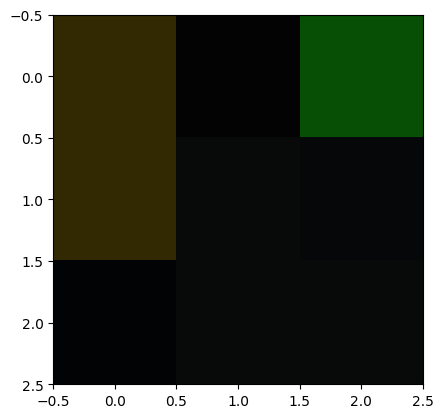

In [6]:
c = Colour(50,40,1)
c
print(c)
print(c.__hash__())
type(c.__hash__())
c.getCmpnt(2)
print(type(c))
print(Colour.es_color(c))
print(Colour.es_color(c))
prev = Image1D.internalize([(1,2,3)])
print(prev)
prev2 = Image1D.internalize([c, (8,9,9), [6,7,8]])
print(prev2)
a = Image1D([c, (3,3,4), [6,79,4]])
print(a)
print(len(a))
print(a[1])
# a.externalize()
w = Image2D([a, prev2, [[2,3,4],[8,9,9],[8,9,9]]])
x = w.externalize()
print('jpppp')
print(x)
print('jjjjj')
print(w)
w.show()
import matplotlib.pyplot as plt
print('kk')
# print(a.externalize())
# print(a.show())
#print(c.show())
w.calculate_histogram()

In [7]:
## PALETTE
class Palette(Image1D):
    '''
    Objects of this class represent palettes. A palette is a 1D-image in which
    there are no duplicate colours and in which the order is arbitrary.
    '''
    # se añadio el código para quitar duplicados
    def __init__(self, colours:ExtDataImage1D):
        colours = list(set(colours))
        super().__init__(colours)

    def __contains__(self, elem:Any) -> bool:
        return elem in self.img1D_data

    # usado por el método 'representative_palette' de esta clase
    def __eq__(self, other:Any) -> bool:
        return set(self.img1D_data) == set(other.img1D_data)

    # añade un color a la paleta solo si no está presente ya
    def add_colour(self, col:Colour):
        if col not in self.img1D_data:
            self.img1D_data.append(col)

    @staticmethod
    def empty_palette() -> 'Palette':
        return Palette([])

    def nearest(self, colour:Colour, dist_fun:DistFunction) -> tuple[int, Colour]:
        index_of_nearest, min_dist = 0, dist_fun(colour, self.img1D_data[0])
        for i in range(1, len(self)):
            di = dist_fun(colour, self.img1D_data[i])
            if di < min_dist:
                index_of_nearest, min_dist = i, di
        return index_of_nearest, self.img1D_data[index_of_nearest]

    # versión de 'nearest' para llamarse desde un objeto de la misma clase
    def nearest_index(self, colour:Colour, dist_fun:DistFunction) -> int:
        return self.nearest(colour, dist_fun)[0]
    
    # versión de 'nearest' para llamarse desde un objeto de otra clase
    def nearest_colour(self, colour:Colour, dist_fun:DistFunction) -> Colour:
        return self.nearest(colour, dist_fun)[1]
    
    def new_palette(self, img2D:'Image2D', dist_fun:DistFunction) -> 'Palette':
        length = len(img2D.img2D_data)
        color_freq = [0]*length
        sums = [ [0]*3 for _ in range(length) ]
        new_p = [ [0]*3 for _ in range(length) ]
        for row in img2D:
            for pixel in row:
                index_of_nearest = self.nearest_index(pixel, dist_fun)
                color_freq[index_of_nearest] += 1
                for i in range(3):
                    sums[index_of_nearest][i] += pixel.col_data[i]
        for i in range(length):
            # avoid division by zero (and useless elements in palette)
            if color_freq[i] != 0:
                for j in range(3):
                    new_p[i][j] = round(sums[i][j]/color_freq[i])
        return Palette(Image1D(new_p))

    def representative_palette(self, img2D:'Image2D', dist_fun:DistFunction) -> 'Palette':
        previous = self
        current = previous.new_palette(img2D, dist_fun)
        while previous != current:
            previous, current = current, current.new_palette(img2D, dist_fun)
        return current
    
    def new_palette_eficiente(self, hist, dist_fun:DistFunction) -> 'Palette':
        print(hist)
        length = len(hist.keys())
        color_freq = [0]*length
        sums = [ [0]*3 for _ in range(length) ]
        new_p = [ [0]*3 for _ in range(length) ]
        for pixel in hist.keys():
            index_of_nearest = self.nearest_index(pixel, dist_fun)
            color_freq[index_of_nearest] += 1
            for i in range(3):
                sums[index_of_nearest][i] += pixel.col_data[i]
        for i in range(length):
            # avoid division by zero (and useless elements in palette)
            if color_freq[i] != 0:
                for j in range(3):
                    new_p[i][j] = round(sums[i][j]/color_freq[i])
        return Palette(Image1D(new_p))

    def representative_palette_eficiente(self, img2D:'Image2D', dist_fun:DistFunction) -> 'Palette':
        previous = self
        hist = img2D.calculate_histogram()
        current = previous.new_palette_eficiente(hist, dist_fun)
        while previous != current:
            previous, current = current, current.new_palette_eficiente(hist, dist_fun)
        return current

In [8]:
c = Colour(3,4,5)
prev2 = Palette(Image1D([c, (3,4,5), [6,7,8]]))
print(prev2)
print(prev2.__contains__(Colour(3,4,5)))
prev3 = Palette(Image1D([c, (6,4,5), [6,70,80]]))
print(prev2 == prev3)
print(prev2)
prev2.add_colour(Colour(9,9,9))
print(prev2)
prev2.add_colour(Colour(9,9,9))
print(prev2)
vacia = Palette.empty_palette()
print(vacia)
vacia.add_colour(Colour(10,10,10))
print(vacia)
print(prev2.nearest(Colour(3,4,6), Colour.dist1))
print(prev2.nearest_colour(Colour(3,4,6), Colour.dist1))




Image1D(Color(R = 3, G = 4, B = 5), Color(R = 6, G = 7, B = 8))
True
False
Image1D(Color(R = 3, G = 4, B = 5), Color(R = 6, G = 7, B = 8))
Image1D(Color(R = 3, G = 4, B = 5), Color(R = 6, G = 7, B = 8), Color(R = 9, G = 9, B = 9))
Image1D(Color(R = 3, G = 4, B = 5), Color(R = 6, G = 7, B = 8), Color(R = 9, G = 9, B = 9))
Image1D()
Image1D(Color(R = 10, G = 10, B = 10))
(0, <__main__.Colour object at 0x000002904EE514B0>)
Color(R = 3, G = 4, B = 5)


In [9]:
a = Image1D([c, (3,3,4), [6,79,4]])
print(a)
print(len(a))
print(a[1])
# a.externalize()
w = Image2D([a, prev2, [[2,3,4],[8,9,9],[0,0,2]]])
print(w)
print(prev2)
print('jjjjjjj')
print(prev2.new_palette_eficiente(w.calculate_histogram(), Colour.dist1))
print('jjjjjjj')
print('jjjjjjj')
a = Palette(Image1D([c, (3,3,4), [6,79,4]]))
print(a.new_palette(w, Colour.dist3))
print('kklkñl')
print(prev2.representative_palette_eficiente(w, Colour.dist1))
print('out')
print(prev2.representative_palette(w, Colour.dist1))

Image1D(Color(R = 3, G = 4, B = 5), Color(R = 3, G = 3, B = 4), Color(R = 6, G = 79, B = 4))
3
Color(R = 3, G = 3, B = 4)
Image2D(Image1D(Image1D(Color(R = 3, G = 4, B = 5), Color(R = 3, G = 3, B = 4), Color(R = 6, G = 79, B = 4))),
Image1D(Image1D(Color(R = 3, G = 4, B = 5), Color(R = 6, G = 7, B = 8), Color(R = 9, G = 9, B = 9))),
Image1D(Image1D(Color(R = 2, G = 3, B = 4), Color(R = 8, G = 9, B = 9), Color(R = 0, G = 0, B = 2))))
Image1D(Color(R = 3, G = 4, B = 5), Color(R = 6, G = 7, B = 8), Color(R = 9, G = 9, B = 9))
jjjjjjj
{<__main__.Colour object at 0x000002904EE514B0>: 2, <__main__.Colour object at 0x000002904EE53B80>: 1, <__main__.Colour object at 0x000002904EE52E90>: 1, <__main__.Colour object at 0x000002904EE50BE0>: 1, <__main__.Colour object at 0x000002904EE53A30>: 1, <__main__.Colour object at 0x000002904EE52080>: 1, <__main__.Colour object at 0x000002904EE524A0>: 1, <__main__.Colour object at 0x000002904EE53E50>: 1}
Image1D(Color(R = 2, G = 2, B = 4), Color(R = 0, G = 0

In [10]:

prev2 = Palette(Image1D([(1,1,1), (3,4,5), [6,7,8]]))
a = Image1D([(3,4,5), (3,3,4), [6,79,4]])
w = Image2D([a, prev2, [[2,3,4],[8,9,9],[0,0,2]]])
pale = Palette(Image1D([(100,100,100), (30,40,50), [60,70,80]]))
print(w)
p = w.img_subst(pale, Colour.dist1)
print(p)

Image2D(Image1D(Image1D(Color(R = 3, G = 4, B = 5), Color(R = 3, G = 3, B = 4), Color(R = 6, G = 79, B = 4))),
Image1D(Image1D(Color(R = 3, G = 4, B = 5), Color(R = 1, G = 1, B = 1), Color(R = 6, G = 7, B = 8))),
Image1D(Image1D(Color(R = 2, G = 3, B = 4), Color(R = 8, G = 9, B = 9), Color(R = 0, G = 0, B = 2))))
Color(R = 30, G = 40, B = 50)
Color(R = 30, G = 40, B = 50)
Color(R = 30, G = 40, B = 50)
Color(R = 30, G = 40, B = 50)
Color(R = 30, G = 40, B = 50)
Color(R = 30, G = 40, B = 50)
Color(R = 30, G = 40, B = 50)
Color(R = 30, G = 40, B = 50)
Color(R = 30, G = 40, B = 50)
[[<__main__.Colour object at 0x000002904EE53B80>, <__main__.Colour object at 0x000002904EE53B80>, <__main__.Colour object at 0x000002904EE53B80>], [<__main__.Colour object at 0x000002904EE53B80>, <__main__.Colour object at 0x000002904EE53B80>, <__main__.Colour object at 0x000002904EE53B80>], [<__main__.Colour object at 0x000002904EE53B80>, <__main__.Colour object at 0x000002904EE53B80>, <__main__.Colour object a